In [1]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.gridspec import GridSpec

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chandan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/chandan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import pandas as pd

# Read the dataset from the URL
url = 'https://raw.githubusercontent.com/anukalp-mishra/Resume-Screening/main/resume_dataset.csv'
resumeDataSet = pd.read_csv(url, encoding='utf-8')

# Add a new column for cleaned resumes
resumeDataSet['cleaned_resume'] = ''

# Display the first few rows of the dataset
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",


In [3]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category -")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category -
Category
Java Developer               14
Database                     11
HR                           11
Data Science                 10
Advocate                     10
DotNet Developer              7
Hadoop                        7
DevOps Engineer               7
Automation Testing            7
Testing                       7
Civil Engineer                6
Business Analyst              6
SAP Developer                 6
Health and fitness            6
Python Developer              6
Arts                          6
Electrical Engineering        5
Sales                         5
Network Security Engineer     5
Mechanical Engineer           5
Web Designing                 5
ETL Developer                 5
Blockchain                    5
Operations Manager            4
PMO                           3
Name: count, dtype: int64


In [4]:
# Check for null values in the dataset
null_values = resumeDataSet.isnull().sum()

# Print columns with null values and their respective counts
for column, count in null_values.items():
    if count > 0:
        print(f'Column "{column}" has {count} null values.')
    else:
        print(f'Column "{column}" has no null values.')


Column "Category" has no null values.
Column "Resume" has no null values.
Column "cleaned_resume" has no null values.


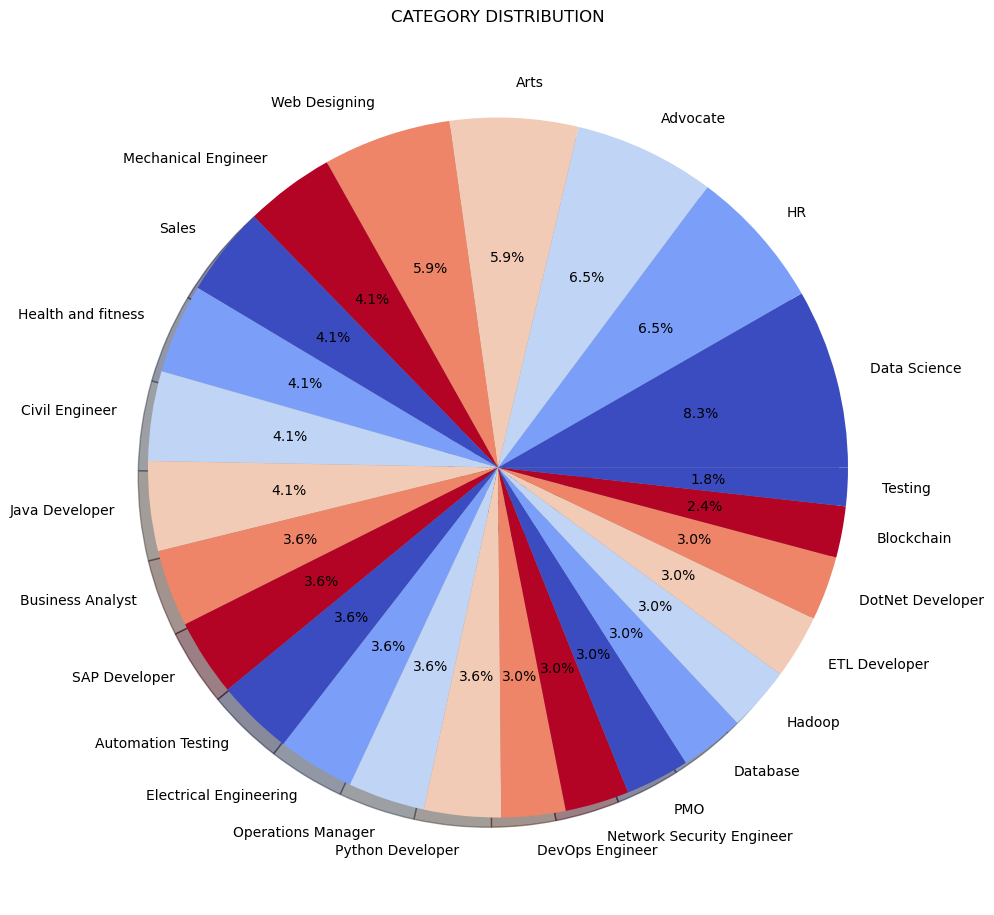

In [5]:
targetCounts = resumeDataSet['Category'].value_counts()
targetLabels  = resumeDataSet['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 6)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [6]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

[('Exprience', 601), ('months', 499), ('company', 496), ('Details', 490), ('description', 436), ('1', 345), ('Project', 288), ('data', 243), ('project', 234), ('year', 218), ('SQL', 212), ('6', 209), ('Maharashtra', 205), ('team', 203), ('Less', 203), ('using', 195), ('January', 173), ('Management', 160), ('Pune', 147), ('C', 142), ('Education', 136), ('Ltd', 136), ('management', 135), ('database', 132), ('Data', 125), ('monthsCompany', 121), ('Engineering', 121), ('Server', 121), ('Database', 117), ('India', 117), ('like', 117), ('The', 116), ('various', 115), ('Pvt', 115), ('business', 114), ('application', 114), ('Responsibilities', 113), ('development', 112), ('System', 110), ('reports', 109), ('2', 109), ('A', 108), ('Java', 106), ('issues', 104), ('requirements', 104), ('Mumbai', 101), ('work', 98), ('system', 96), ('Role', 96), ('Test', 96)]


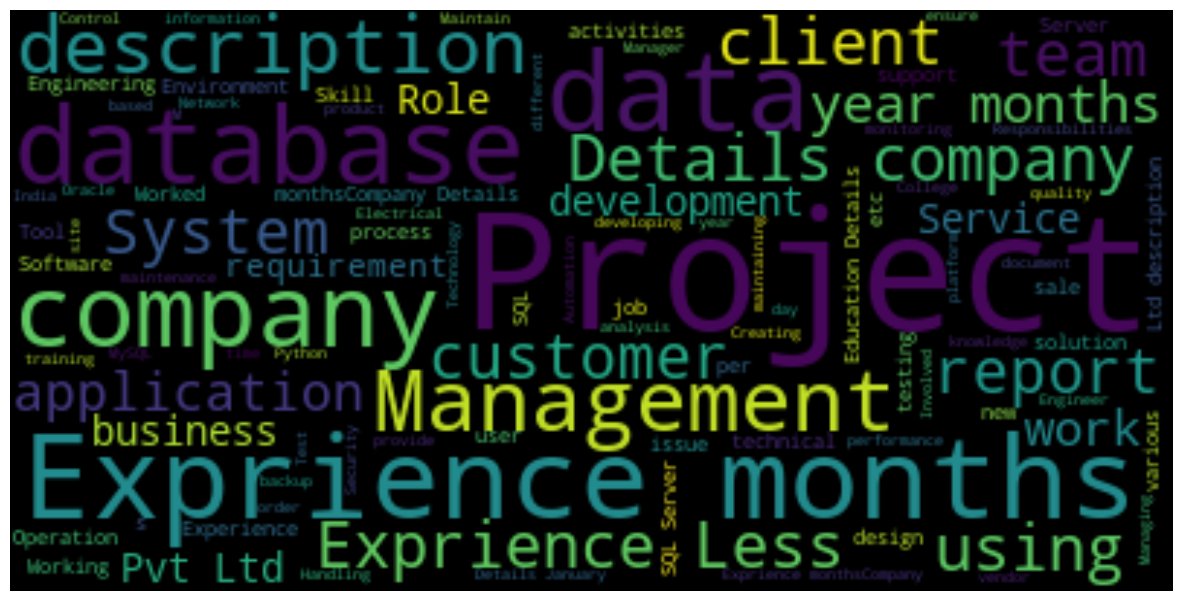

In [7]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['Resume'].values
cleanedSentences = ""
for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

In [9]:
requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

#print ("Shape of Train an d")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print('Shape of Train Data =',X_train.shape)
print('Shape of Test Data =',X_test.shape)

Shape of Train Data = (135, 1500)
Shape of Test Data = (34, 1500)


In [10]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 0.88
Accuracy of KNeighbors Classifier on test set: 0.79

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         1
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       0.50      1.00      0.67         1
           9       1.00      1.00      1.00         4
          11       1.00      0.33      0.50         3
          13       1.00      1.00      1.00         2
          14       1.00      0.67      0.80         3
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1
          17       1.00      0.50      0.

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Multinomial Naive Bayes': MultinomialNB()
}

# Iterate over classifiers and print their accuracy
for classifier_name, classifier in classifiers.items():
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    train_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    print(f'Classifier: {classifier_name}')
    print(f'Accuracy on training set: {train_accuracy:.2f}')
    print(f'Accuracy on test set: {test_accuracy:.2f}')
    print("\n Classification report:\n%s\n" % metrics.classification_report(y_test, prediction))


Classifier: Random Forest
Accuracy on training set: 1.00
Accuracy on test set: 0.68

 Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         1
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         1
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1
           9       1.00      0.50      0.67         4
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00         2
          14       1.00      0.33      0.50         3
          15       0.50      1.00      0.67         2
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         2
          18       0.00   

In [12]:
from itertools import combinations
from sklearn.ensemble import VotingClassifier

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Generate all possible combinations of classifiers
combinations_list = []
for r in range(1, len(classifiers) + 1):
    combinations_list.extend(combinations(classifiers.items(), r))

# Iterate over all combinations and perform ensembling
for combination in combinations_list:
    classifiers_list = [(name, classifier.fit(X_train, y_train)) for name, classifier in combination]
    classifier_names = ' + '.join([name for name, _ in classifiers_list])
    
    # Define and fit the ensemble model
    ensemble_model = VotingClassifier(estimators=classifiers_list, voting='hard')
    ensemble_model.fit(X_train, y_train)
    
    # Predict the results
    prediction = ensemble_model.predict(X_test)
    
    # Calculate accuracy
    train_accuracy = ensemble_model.score(X_train, y_train)
    test_accuracy = ensemble_model.score(X_test, y_test)
    
    # Print results
    print(f'Ensemble of classifiers: {classifier_names}')
    print(f'Accuracy on training set: {train_accuracy:.2f}')
    print(f'Accuracy on test set: {test_accuracy:.2f}')
    print("\n Classification report:\n%s\n" % metrics.classification_report(y_test, prediction))


Ensemble of classifiers: Random Forest
Accuracy on training set: 1.00
Accuracy on test set: 0.53

 Classification report:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00         1
           5       0.50      1.00      0.67         1
           6       0.50      1.00      0.67         3
           7       0.50      1.00      0.67         1
           9       1.00      0.50      0.67         4
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00         2
          14       1.00      0.33      0.50         3
          15       0.67      1.00      0.80         2
          16       1.00      1.00      1.00         1
          17       1.00      0.50      0.67         2
          20 

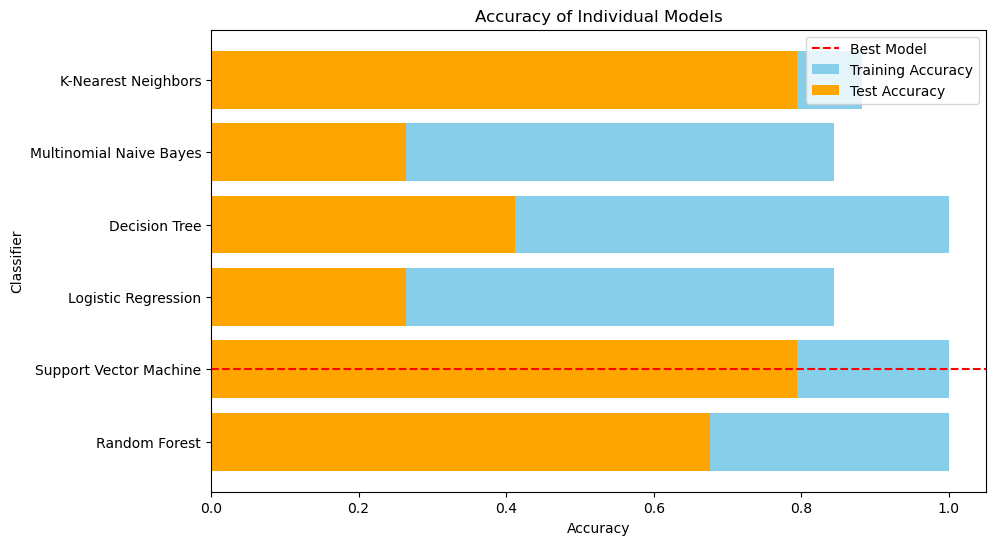

In [13]:
import matplotlib.pyplot as plt

# Initialize dictionaries to store accuracies
train_accuracies = {}
test_accuracies = {}

# Iterate over classifiers and store accuracies
for classifier_name, classifier in classifiers.items():
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_train, y_train)
    train_accuracies[classifier_name] = clf.score(X_train, y_train)
    test_accuracies[classifier_name] = clf.score(X_test, y_test)

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot training accuracies
plt.barh(list(train_accuracies.keys()), list(train_accuracies.values()), color='skyblue', label='Training Accuracy')

# Plot testing accuracies
plt.barh(list(test_accuracies.keys()), list(test_accuracies.values()), color='orange', label='Test Accuracy')

# Highlight the model with the highest test accuracy
best_model = max(test_accuracies, key=test_accuracies.get)
plt.axhline(y=best_model, color='red', linestyle='--', label='Best Model')

plt.xlabel('Accuracy')
plt.ylabel('Classifier')
plt.title('Accuracy of Individual Models')
plt.legend()
plt.show()

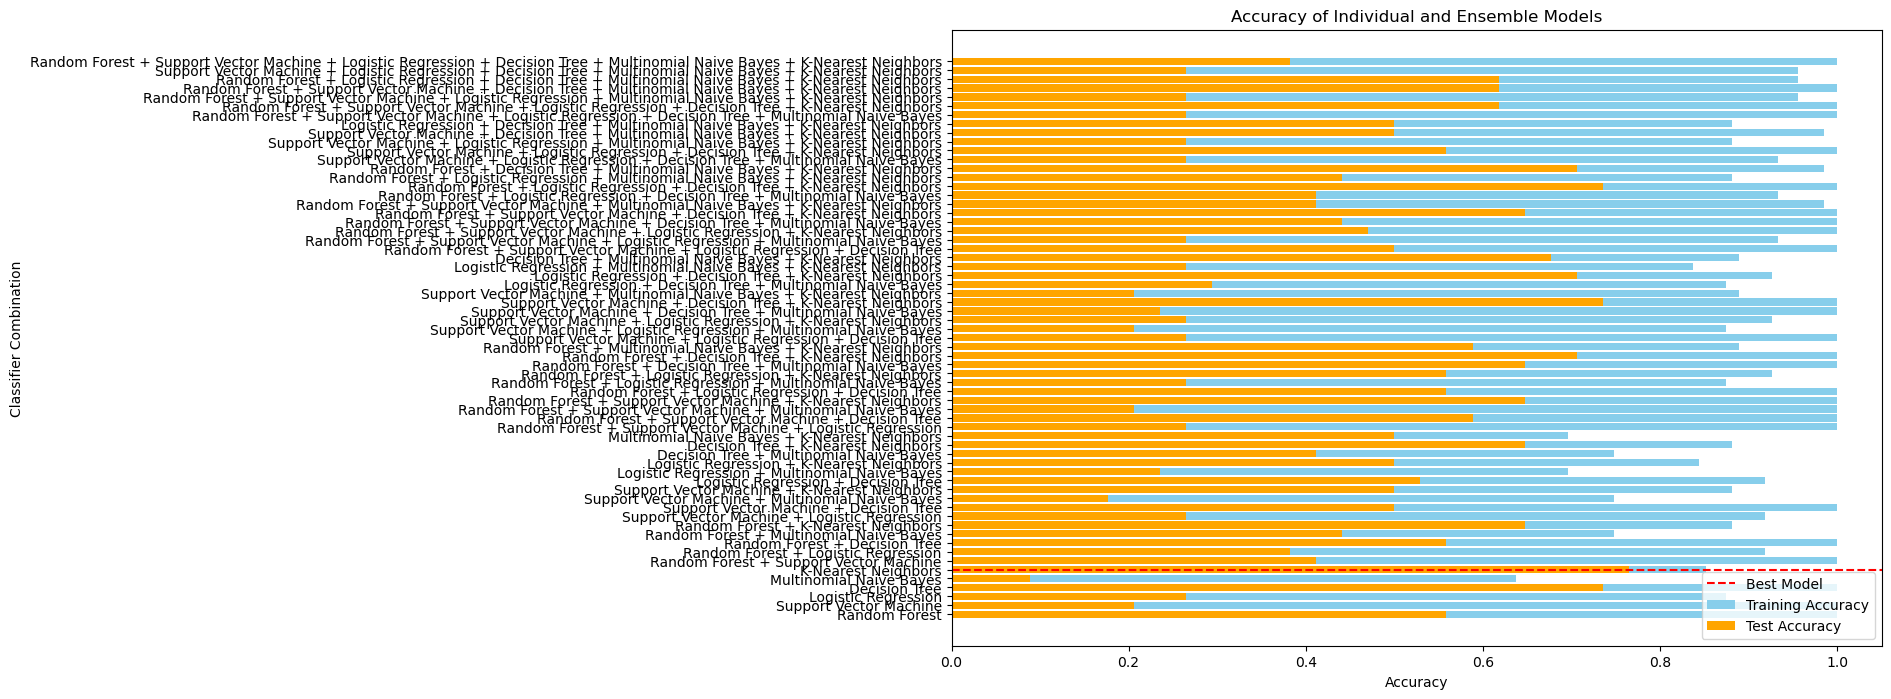

In [14]:
from itertools import combinations
import matplotlib.pyplot as plt

# Initialize dictionaries to store accuracies
train_accuracies = {}
test_accuracies = {}

# Generate all possible combinations of classifiers
combinations_list = []
for r in range(1, len(classifiers) + 1):
    combinations_list.extend(combinations(classifiers.items(), r))

# Iterate over all combinations and perform ensembling
for combination in combinations_list:
    classifiers_list = [(name, classifier.fit(X_train, y_train)) for name, classifier in combination]
    classifier_names = ' + '.join([name for name, _ in classifiers_list])
    
    # Define and fit the ensemble model
    ensemble_model = VotingClassifier(estimators=classifiers_list, voting='hard')
    ensemble_model.fit(X_train, y_train)
    
    # Calculate accuracy
    train_accuracies[classifier_names] = ensemble_model.score(X_train, y_train)
    test_accuracies[classifier_names] = ensemble_model.score(X_test, y_test)

# Plotting the results
plt.figure(figsize=(12, 8))

# Plot training accuracies
plt.barh(list(train_accuracies.keys()), list(train_accuracies.values()), color='skyblue', label='Training Accuracy')

# Plot testing accuracies
plt.barh(list(test_accuracies.keys()), list(test_accuracies.values()), color='orange', label='Test Accuracy')

# Highlight the model with the highest test accuracy
best_model = max(test_accuracies, key=test_accuracies.get)
plt.axhline(y=best_model, color='red', linestyle='--', label='Best Model')

plt.xlabel('Accuracy')
plt.ylabel('Classifier Combination')
plt.title('Accuracy of Individual and Ensemble Models')
plt.legend()
plt.show()


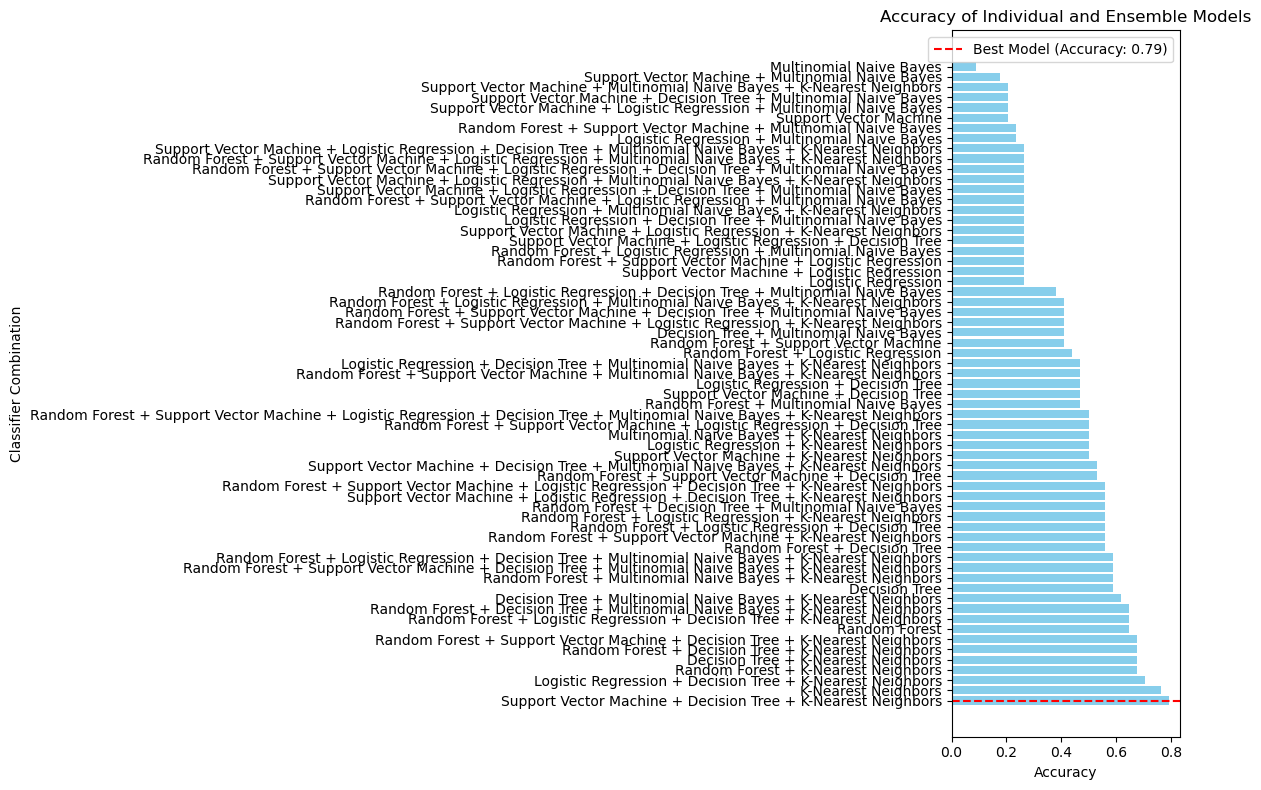

In [15]:
from itertools import combinations
import matplotlib.pyplot as plt

# Initialize dictionaries to store accuracies
train_accuracies = {}
test_accuracies = {}

# Generate all possible combinations of classifiers
combinations_list = []
for r in range(1, len(classifiers) + 1):
    combinations_list.extend(combinations(classifiers.items(), r))

# Iterate over all combinations and perform ensembling
for combination in combinations_list:
    classifiers_list = [(name, classifier.fit(X_train, y_train)) for name, classifier in combination]
    classifier_names = ' + '.join([name for name, _ in classifiers_list])
    
    # Define and fit the ensemble model
    ensemble_model = VotingClassifier(estimators=classifiers_list, voting='hard')
    ensemble_model.fit(X_train, y_train)
    
    # Calculate accuracy
    train_accuracies[classifier_names] = ensemble_model.score(X_train, y_train)
    test_accuracies[classifier_names] = ensemble_model.score(X_test, y_test)

# Sort accuracies based on test accuracies
sorted_test_accuracies = sorted(test_accuracies.items(), key=lambda x: x[1], reverse=True)

# Extract classifier names and accuracy values for plotting
classifier_names = [name for name, _ in sorted_test_accuracies]
accuracy_values = [accuracy for _, accuracy in sorted_test_accuracies]

# Plotting the results
plt.figure(figsize=(12, 8))

plt.barh(classifier_names, accuracy_values, color='skyblue')

# Highlight the model with the highest test accuracy
best_model = max(test_accuracies, key=test_accuracies.get)
best_accuracy = test_accuracies[best_model]
plt.axhline(y=best_model, color='red', linestyle='--', label=f'Best Model (Accuracy: {best_accuracy:.2f})')

plt.xlabel('Accuracy')
plt.ylabel('Classifier Combination')
plt.title('Accuracy of Individual and Ensemble Models')
plt.legend()
plt.tight_layout()
plt.show()


In [16]:
from sklearn.metrics import accuracy_score
from itertools import combinations
from sklearn.ensemble import VotingClassifier

# Initialize lists to store accuracies
model_names = []
accuracies = []

# Iterate over classifiers and store accuracies
for classifier_name, classifier in classifiers.items():
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_names.append(classifier_name)
    accuracies.append(accuracy)

# Generate all possible combinations of classifiers
combinations_list = []
for r in range(1, len(classifiers) + 1):
    combinations_list.extend(combinations(classifiers.items(), r))

# Iterate over all combinations and perform ensembling
for combination in combinations_list:
    classifiers_list = [(name, classifier.fit(X_train, y_train)) for name, classifier in combination]
    classifier_names = ' + '.join([name for name, _ in classifiers_list])
    
    # Define and fit the ensemble model
    ensemble_model = VotingClassifier(estimators=classifiers_list, voting='hard')
    ensemble_model.fit(X_train, y_train)
    
    # Predict the results
    y_pred = ensemble_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append accuracy and model name
    model_names.append(classifier_names)
    accuracies.append(accuracy)

# Find the index of the best model
best_model_index = accuracies.index(max(accuracies))

# Highlight the best model
best_model_name = model_names[best_model_index]

# Print accuracies of all models
for i, (model_name, accuracy) in enumerate(zip(model_names, accuracies)):
    print(f'{model_name}: {accuracy:.4f}', end='')
    if i == best_model_index:
        print(' (Best Model)')
    else:
        print()


Random Forest: 0.6176
Support Vector Machine: 0.7941 (Best Model)
Logistic Regression: 0.2647
Decision Tree: 0.5000
Multinomial Naive Bayes: 0.2647
K-Nearest Neighbors: 0.7941
Random Forest: 0.5294
Support Vector Machine: 0.2059
Logistic Regression: 0.2647
Decision Tree: 0.7647
Multinomial Naive Bayes: 0.0882
K-Nearest Neighbors: 0.7647
Random Forest + Support Vector Machine: 0.4412
Random Forest + Logistic Regression: 0.4118
Random Forest + Decision Tree: 0.6471
Random Forest + Multinomial Naive Bayes: 0.4706
Random Forest + K-Nearest Neighbors: 0.6765
Support Vector Machine + Logistic Regression: 0.2647
Support Vector Machine + Decision Tree: 0.4412
Support Vector Machine + Multinomial Naive Bayes: 0.1765
Support Vector Machine + K-Nearest Neighbors: 0.5000
Logistic Regression + Decision Tree: 0.5000
Logistic Regression + Multinomial Naive Bayes: 0.2353
Logistic Regression + K-Nearest Neighbors: 0.5000
Decision Tree + Multinomial Naive Bayes: 0.4412
Decision Tree + K-Nearest Neighbor

In [17]:
from operator import itemgetter

# Combine model names and accuracies into a list of tuples
model_accuracy_pairs = list(zip(model_names, accuracies))

# Sort the list of tuples by accuracy in descending order
sorted_model_accuracy_pairs = sorted(model_accuracy_pairs, key=itemgetter(1), reverse=True)

# Print the top n models with the highest accuracy

for i, (model_name, accuracy) in enumerate(sorted_model_accuracy_pairs[:3], start=1):
    print(f"{i}.{model_name}, Accuracy: {accuracy:.5f}")


1.Support Vector Machine, Accuracy: 0.79412
2.K-Nearest Neighbors, Accuracy: 0.79412
3.Decision Tree, Accuracy: 0.76471


In [18]:
# Define relevant keywords
relevant_keywords = ['python', 'java', 'machine learning', 'data analysis', 'problem solving', 'c','c++','project','projects']
#change it for relevant keywords

# Function to calculate ATS score for a resume
def calculate_ats_score(resume_text, keywords):
    resume_text_lower = resume_text.lower()
    total_keywords = len(keywords)
    keyword_count = sum(keyword in resume_text_lower for keyword in keywords)
    ats_score = (keyword_count / total_keywords) * 100
    return ats_score

# Calculate ATS score for each resume
resumeDataSet['ATS_Score'] = resumeDataSet['cleaned_resume'].apply(lambda x: calculate_ats_score(x, relevant_keywords))

# Highlight resumes that are shortlisted based on ATS score
resumeDataSet['Status'] = np.where(resumeDataSet['ATS_Score'] > 60, 'Shortlisted', 'Not Shortlisted')

# Print the shortlisted resumes
shortlisted_resumes = resumeDataSet[resumeDataSet['Status'] == 'Shortlisted']
print("Shortlisted Resumes:")
print(shortlisted_resumes[['ATS_Score','Resume','Status']])


Shortlisted Resumes:
   ATS_Score                                             Resume       Status
0  66.666667  Skills * Programming Languages: Python (pandas...  Shortlisted
7  77.777778  Education Details \n B.Tech   Rayat and Bahra ...  Shortlisted
9  66.666667  Expertise â Data and Quantitative Analysis â...  Shortlisted


In [19]:
# Function to calculate ATS score for a custom input resume using provided keywords and blacklist keywords
def calculate_custom_ats_score(resume_text, keywords, blacklist_keywords):
    # Check for blacklisted words in the resume text
    for keyword in blacklist_keywords:
        if keyword in resume_text.lower():
            return 0, 'Not Shortlisted', f"Contains blacklisted word: '{keyword}'"

    # Calculate ATS score
    ats_score = calculate_ats_score(resume_text, keywords)
    
    # Check if the ATS score meets the threshold
    status = 'Shortlisted' if ats_score > 60 else 'Not Shortlisted'
    return ats_score, status, None

# Function to input blacklist keywords from the user
def input_blacklist_keywords():
    keywords_input = input("Please input the blacklist keywords separated by commas (e.g., keyword1,keyword2,keyword3):\n")
    keywords = [keyword.strip() for keyword in keywords_input.split(',')]
    return keywords

# Input blacklist keywords from the user
custom_blacklist_keywords = input_blacklist_keywords()

# Function to input resume text from the user
def input_resume():
    resume_text = input("Please input the resume text:\n")
    return resume_text

# Function to input keywords from the user
def input_keywords():
    keywords_input = input("Please input the relevant keywords separated by commas in all small text (e.g., python,java,machine learning):\n")
    keywords = [keyword.strip() for keyword in keywords_input.split(',')]
    return keywords

# Input keywords from the user
custom_keywords = input_keywords()

# Input resume text from the user
custom_resume_text = input_resume()

# Calculate ATS score and shortlist based on the custom input resume and keywords
ats_score, status, reason = calculate_custom_ats_score(custom_resume_text, custom_keywords, custom_blacklist_keywords)

# Print the ATS score and shortlisting status with reason
print("\nATS Score for the Custom Input Resume:", ats_score)
print("Status:", status)
if reason:
    print("Reason:", reason)


Please input the blacklist keywords separated by commas (e.g., keyword1,keyword2,keyword3):
 law
Please input the relevant keywords separated by commas in all small text (e.g., python,java,machine learning):
 java, mongodb, python, machine learning
Please input the resume text:
 import streamlit as st  # Function to calculate ATS score for a resume def calculate_ats_score(resume_text, keywords):     # Placeholder function, replace with your ATS scoring logic     ats_score = 80     return ats_score  # Function to determine shortlisting status def determine_shortlisting_status(ats_score):     # Placeholder function, replace with your shortlisting logic     status = "Shortlisted" if ats_score > 60 else "Not Shortlisted"     return status  # Streamlit app def main():     st.set_page_config(page_title="Resume Screening Tool", page_icon=":clipboard:", layout="wide")      st.title("Resume Screening Tool")     st.write("Welcome to the Resume Screening Tool! Enter your resume text and relevant 


ATS Score for the Custom Input Resume: 0.0
Status: Not Shortlisted


A. In this project, classification algorithms were used for the following reasons.

1. Automated Screening: Manual screening of resumes is time-consuming and prone to human bias. By using classification algorithms, the screening process can be automated, saving time and reducing human bias.

2. Categorization: Resumes often belong to different categories (e.g., software engineering, data science, marketing). Classification algorithms can categorize resumes into these predefined categories based on their content.

3. Keyword Extraction: Classification algorithms can analyze the content of resumes and extract relevant keywords or features that are indicative of the category to which the resume belongs. These keywords or features can then be used to make classification decisions.

4. Scalability: As the number of resumes to be screened increases, manual screening becomes increasingly impractical. Classification algorithms can handle large volumes of resumes efficiently, making the screening process scalable.

5. Consistency: Classification algorithms provide consistent results based on predefined criteria, reducing variability compared to manual screening by different individuals.

B. In this project, the Applicant Tracking System (ATS) score was calculated as a metric to evaluate the suitability of a resume for a particular job or category. The ATS score indicates the degree to which a resume matches the job requirements or relevant keywords.

Here's an overview of how the ATS score was calculated in the project:

1. Keyword Matching: The first step in calculating the ATS score is to identify relevant keywords or terms that are indicative of the desired skills, qualifications, or experience for the job or category.

2. Text Analysis: The resume text is then analyzed to identify the presence of these relevant keywords. This can be done using various techniques such as tokenization, text preprocessing, and keyword matching.

3. Scoring: Each keyword found in the resume contributes to the ATS score. The more relevant keywords a resume contains, the higher its ATS score. Some variations in scoring can also consider factors such as the frequency of keyword occurrences or their importance.

4. Normalization: Optionally, the ATS score can be normalized to a scale of 0 to 100 for easier interpretation. This allows for a more standardized comparison of different resumes.

5. Threshold: A threshold value is typically set to determine whether a resume is considered suitable or "shortlisted" based on its ATS score. Resumes with ATS scores above the threshold are shortlisted for further consideration, while those below the threshold may be rejected.

6. ATS Evaluation: Finally, the ATS score is evaluated against the threshold to determine the shortlisting status of the resume. If the ATS score exceeds the threshold, the resume is considered suitable and may be shortlisted for further review. Otherwise, it may be rejected.

In the project, the ATS (Applicant Tracking System) score was calculated using a combination of keyword matching and scoring techniques. The goal was to assess the relevance of a resume to a specific job or category based on the presence of relevant keywords.

Here's how the ATS score calculation process works:

1. **Keyword Identification**: Relevant keywords or key phrases are identified for each job or category. These keywords represent the skills, qualifications, experience, or other attributes desired for the role.

2. **Text Analysis**: The resume text is analyzed to identify the presence of these relevant keywords. This may involve techniques such as tokenization, text preprocessing, and keyword matching.

3. **Keyword Matching**: Each keyword found in the resume contributes to the ATS score. The more relevant keywords a resume contains, the higher its ATS score. Some variations in scoring can also consider factors such as the frequency of keyword occurrences or their importance.

4. **Scoring**: The presence of each relevant keyword in the resume contributes to the overall ATS score. The score can be calculated based on various criteria, such as a binary score (1 for presence, 0 for absence), weighted score (assigning different weights to keywords based on importance), or other scoring mechanisms.

5. **Normalization**: Optionally, the ATS score can be normalized to a scale of 0 to 100 for easier interpretation. This allows for a more standardized comparison of different resumes.

6. **Threshold**: A threshold value is set to determine whether a resume is considered suitable or "shortlisted" based on its ATS score. Resumes with ATS scores above the threshold are shortlisted for further consideration, while those below the threshold may be rejected.

7. **ATS Evaluation**: Finally, the ATS score is evaluated against the threshold to determine the shortlisting status of the resume. If the ATS score exceeds the threshold, the resume is considered suitable and may be shortlisted for further review. Otherwise, it may be rejected.

Regarding the project's architecture, here's a high-level overview:

1. **Data Collection**: Resumes are collected from various sources and stored in a dataset.

2. **Preprocessing**: The resume data undergoes preprocessing steps to clean and standardize the text data, including tasks like removing irrelevant information, standardizing formatting, and tokenizing the text.

3. **Keyword Identification**: Relevant keywords are identified for each job or category. These keywords are used as input for the ATS score calculation.

4. **ATS Score Calculation**: The resume text is analyzed, and the ATS score is calculated based on the presence and relevance of keywords using the algorithm described above.

5. **Model Integration**: The ATS score calculation algorithm may be integrated into a larger system that includes other components, such as classification models for categorizing resumes into specific job roles or categories.

6. **User Interface**: A user-friendly interface is developed to allow users to input their resume text and view the ATS score and shortlisting status.

7. **Deployment**: The system, including the ATS score calculation algorithm and user interface, is deployed to a server or cloud platform where it can be accessed by users.

Overall, the project's architecture involves collecting resume data, preprocessing it, identifying relevant keywords, calculating the ATS score, integrating the algorithm into a larger system, developing a user interface, and deploying the system for use by recruiters and hiring managers.

In [20]:
import streamlit as st

# Function to calculate ATS score for a resume
def calculate_ats_score(resume_text, keywords):
    # Placeholder function, replace with your ATS scoring logic
    ats_score = 80
    return ats_score

# Function to determine shortlisting status
def determine_shortlisting_status(ats_score):
    # Placeholder function, replace with your shortlisting logic
    status = "Shortlisted" if ats_score > 60 else "Not Shortlisted"
    return status

# Streamlit app
def main():
    st.set_page_config(page_title="Resume Screening Tool", page_icon=":clipboard:", layout="wide")

    st.title("Resume Screening Tool")
    st.write("Welcome to the Resume Screening Tool! Enter your resume text and relevant keywords below.")

    # Input resume text
    resume_text = st.text_area("Input Resume Text", height=300)

    # Input relevant keywords
    relevant_keywords_input = st.text_input("Input Relevant Keywords (comma-separated)")

    # Input blacklist keywords
    blacklist_keywords_input = st.text_input("Input Blacklist Keywords (comma-separated)")

    # Convert relevant and blacklist keywords to lists
    relevant_keywords = [keyword.strip() for keyword in relevant_keywords_input.split(',')]
    blacklist_keywords = [keyword.strip() for keyword in blacklist_keywords_input.split(',')]

    # Calculate ATS score and shortlisting status
    if st.button("Evaluate Resume"):
        ats_score = calculate_ats_score(resume_text, relevant_keywords)
        status = determine_shortlisting_status(ats_score)

        st.write(f"ATS Score: {ats_score}")
        st.write(f"Shortlisting Status: {status}")

        if status == "Not Shortlisted":
            st.error("This resume does not meet the shortlisting criteria.")

if __name__ == "__main__":
    main()


2024-03-08 18:02:10.486 
  command:

    streamlit run /opt/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]
